# Price and Company data for the S&P 500

# Overview

This DataSet came from kaggle.  To see a comprehensive overview 
visit: https://www.kaggle.com/dgawlik/nyse

It contains several files that have features suitable for both:

    - Technical Analysis (utilizing pricing and volume data for a stock in order to gauge the pull&push of supply-and-demand)
    - Fundamental Analysis (utilizing measures & features that describe the health of the core business to gauge value)

For this analysis I will focus on the technical data from (2010-2016) contained within prices-split-adjusted.csv.
The file: fundamentals.csv has the annual company filings from 2012 - 2016.  

Where appropriate I will use the annual fundamentals of a stock to give the technical analysis additional context.

# What's in our dataset ?

Firstly, let us load our prices-split-adjusted.csv into a Pandas DataFrame.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sps
import datetime
import matplotlib
%matplotlib inline

# global stock dataframe
stock_df = ''

In [8]:
stocks_df = pd.read_csv('nyse/prices-split-adjusted.csv').sort_values(by=['date'])
stocks_df.head(1)

,date,symbol,open,close,low,high,volume
646,2010-01-04,SYMC,18.040001,18.4,18.01,18.530001,8322300.0


The relevant features here are the pricing columns (open, close, low, high) for the current day.  
The volume feature is the number of daily transactions for the stock.

Now that the data is loaded let's calculate the mean and standard deviation for a specific stock.
We will use Apple (AAPL) as our population sample

In [9]:
fundamentals = pd.read_csv('nyse/fundamentals.csv')
apple_df = stocks_df[stocks_df['symbol'] == 'AAPL']
apple_high_df1_np = apple_df['high'].values
#df1['high'].sort_values(by=['date']).values
apple_df.sort_values(by=['date'])
apple_high_df1_np

array([  30.64285657,   30.79857057,   30.74714286, ...,  118.019997  ,
        117.110001  ,  117.199997  ])

Once we've filtered out Apple's data we can use numpy to evaluate the mean and standard deviation.

In [10]:
apple_mean = np.mean(apple_high_df1_np)
apple_sd = np.std(apple_high_df1_np)
apple_max = np.max(apple_high_df1_np)
apple_min = np.min(apple_high_df1_np)
print('mean: ', apple_mean, '\nstddev: ', apple_sd, "\nminimum: ", apple_min, "\nmaximum: ", apple_max)

mean:  80.1404466937 
stddev:  28.5529213874 
minimum:  28.0 
maximum:  134.539993


Regarding Apple's Stock price highs for this period, we can say they have an average of \$80 and a standard deviation of \$29, 

along with a 
minimim high of \$28 and a maximum of \$134.  But...

# Are Stock Prices a Normal Distribution ?

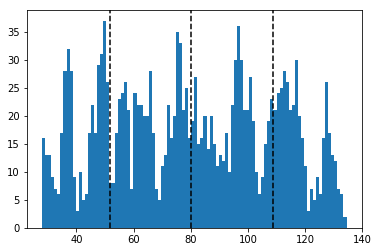

In [11]:
plt.hist(apple_high_df1_np, 100)
plt.axvline(x=apple_mean,linestyle='dashed',color='black')
plt.axvline(x=apple_mean+apple_sd,linestyle='dashed', color='black')
plt.axvline(x=apple_mean-apple_sd,linestyle='dashed', color='black')
plt.show()

As we can see from the chart, the mean and stadard deviation markings coincide with our earlier calculations.  Since a normal-distrubtion contains 95% of the data in 2 - stddevs we can conclude that Stock Prices are not normally distributed

For convenience, if your data is in a Pandas Dataframe we can use the describe() method as a more convenient way to return the mean and standard deviation for a population:

In [12]:
apple_df['high'].describe()

count    1762.000000
mean       80.140447
std        28.561027
min        28.000000
25%        55.909286
50%        79.344284
75%       104.424997
max       134.539993
Name: high, dtype: float64

# Are Stock Prices highly-correlated with Volume ?

In [13]:
np.corrcoef(apple_df['high'], apple_df['volume'])

array([[ 1.        , -0.57868105],
       [-0.57868105,  1.        ]])

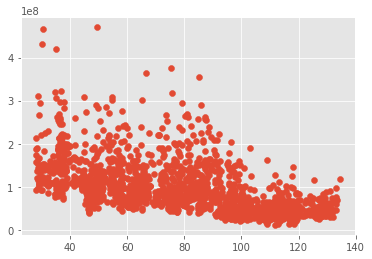

In [14]:
matplotlib.style.use('ggplot')
plt.scatter(apple_df['high'], apple_df['volume'])
plt.show()

Price and Volume are not highly-correlated.  Using the np.corrceof method we can see that Stock Prices and Volume are moderately (negative) correlated with each other. 

The scatterplot of the high-price and volume features shows that this conclusion visually.  Notice that the slope of line of best fit is negative and that the clustering of the values is loosley coupled.

# How do the other features in the pricing dataset correlate with volume ?

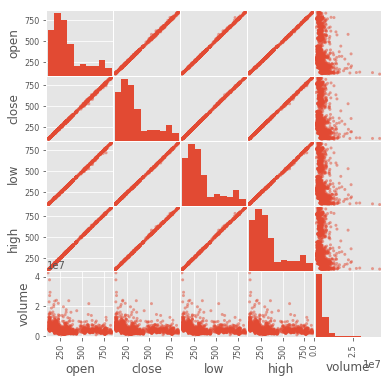

In [47]:
pd.plotting.scatter_matrix(stock_df, figsize=(6,6))
plt.show()

# How does AAPL compare with other stocks ?

To compare AAPL with other stocks, I have created functions that can be applied to other stock symbols.

In [15]:
def DescribeStock( symbol, column ):
    global stock_df
    print('symbol: ',symbol, ' column: ', column)
    stock_df = stocks_df[stocks_df['symbol'] == symbol]
    stock_np = stock_df[column].values
    print(stock_df[column].describe())
    return

In [38]:
def Histogram( stock, column, bins ):
    stock_df = stocks_df[stocks_df['symbol'] == stock]
    #print(stock_df)
    stk_mean = np.mean(stock_df[column].values)
    stk_sd = np.std(stock_df[column].values)
    plt.hist(stock_df[column].values, bins)
    plt.axvline(x=stk_mean,linestyle='dashed',color='black')
    plt.axvline(x=stk_mean+stk_sd,linestyle='dashed', color='black')
    plt.axvline(x=stk_mean-stk_sd,linestyle='dashed', color='black')
    plt.show()
    return

In [17]:
def Calculate_T_Value(symbol, feature_a, feature_b, year):
    #Year filter
    stocks_df['date'] = pd.to_datetime(stocks_df['date'])
    datetime1 = datetime.date(year,1,1) 
    ByYear = stocks_df['date'] >= datetime1
    
    #Symbol Filter
    BySymbol = stocks_df['symbol'] == symbol

    stock_df = stocks_df[BySymbol & ByYear]
    stock_feature_a_np = stock_df[feature_a].values
    stock_feature_b_np = stock_df[feature_b].values
    
    # t-value use scipy
    from scipy.stats import ttest_ind
    print(ttest_ind(stock_feature_b_np, stock_feature_a_np, equal_var=False))
    return

In [18]:
def DescribeStockByYear( symbol, column, year ):
    global stock_df
    stocks_df['date'] = pd.to_datetime(stocks_df['date'])
    datetime1 = datetime.date(year,1,1) 
    ByYear = stocks_df['date'] >= datetime1
    BySymbol = stocks_df['symbol'] == symbol
    print('symbol: ',symbol, ' summary-year: ', year)
    stock_df = stocks_df[BySymbol & ByYear]
    stock_np = stock_df[column].values
    #print(stock_df[column].describe().mean)
    summary = stock_df[column].describe()
    summary_list = list(summary)
    print('\tmean: ', summary_list[1], '\n\tstd: ', summary_list[2])
    #print(summary)
    return summary_list

symbol:  AMZN  column:  high
count    1762.000000
mean      341.464438
std       190.525796
min       111.290001
25%       195.532501
50%       285.074997
75%       402.082496
max       847.210022
Name: high, dtype: float64


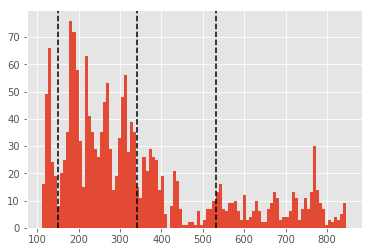

In [39]:
symbol = 'AMZN'
DescribeStock(symbol, column)
Histogram(symbol, column, 100)

In [37]:
#stocks_df.symbol.unique()

# Using a candlestick chart, What is the trend for Open, High, Low, & Close prices for a given stock ?

A candlestick chart represents the open, high, low, & close price for a given day.  Using the finance library of matplotlib, I am able to etract the given stock and chart the data for all the datapoints in the given dataset.

In [41]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

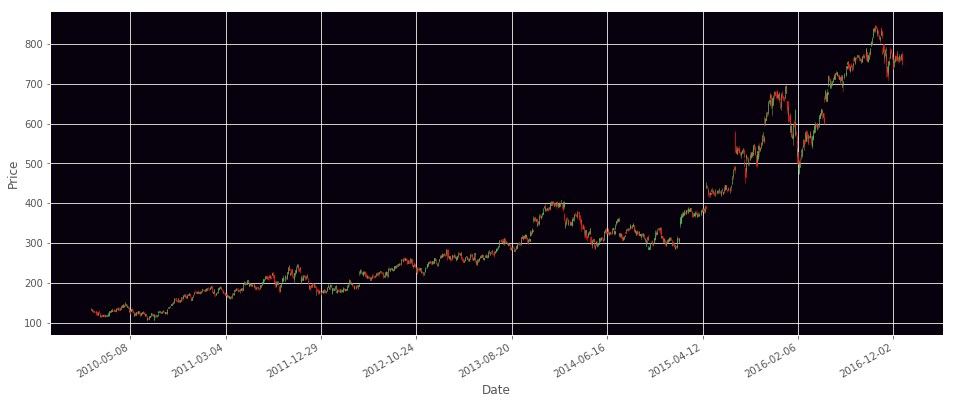

In [42]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.widgets import Slider

#stock_df.head(1111)
stock_df = stocks_df[stocks_df['symbol'] == symbol]
df1 = stock_df[['date','open','high','low','close','volume']]
#df1
fig = plt.figure(figsize=(16, 8))
#ax1 = plt.subplot2grid((1,1), (0,0))
ax1 = plt.subplot2grid((6, 4), (1, 0), rowspan=6, colspan=4, facecolor='#07000d')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
fig.autofmt_xdate()
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')

date1 = (2013, 1, 1)
date2 = (2016, 12, 31)




df1.is_copy = False
df1['date'] = df1['date'].apply(mdates.date2num)
#df1.head(11)
_ = candlestick_ohlc(ax1, df1.values, width=.6, colorup='#53c156', colordown='#ff1717')



# We can see from the chart, Apple stock has been on an upward trend since 2010

# What other analysis can we do with this data ?

### More interesting analysis can be done if we add 'calculated' features to our dataset.  Metrics such has moving averages and determing the average daily range can be used to make trading suggestions.


#### Using calculated features may also be used for predictive or probability trading.  Patterns that will be useful will be determing local highs and lows which can signal a short or long position to maxize trading gains.  These kinds of trades are known as swing trades as they signal a breakout movement in pricing which signal big differentials in supply and demand for a stock.

#### Other useful datapoints to consider are when the stock is less volatile.  In the candle stick chart above there are several periods where Apple's stock is stable within a small price range.  These 'smaller' ranges would be excellent opportunities for arbitrage trading where the investor is finding local maxima and minima to gain reliable points.

